In [55]:
# IMPORTS 
import pandas as pd
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import time
from openrouteservice import Client
import sys
sys.path.append("../")
import overpy
from shapely.geometry import Point



In [56]:
# Read the CSV file into a DataFrame
businesses = pd.read_csv('../data/curated/extrapolated_business.csv')

# Keep only the 'SA2_name_2021' and '2024' columns and explicitly create a copy
base_df = businesses[['SA2_name_2021', '2024']].copy()

# Rename the '2024' column to 'num_businesses'
base_df.rename(columns={'2024': 'num_businesses'}, inplace=True)

# Display the first 10 rows of the DataFrame
base_df.head(10)

,SA2_name_2021,num_businesses
0,Abbotsford,1783.700000
1,Airport West,1032.100000
2,Albert Park,5590.500000
3,Alexandra,889.000000
4,Alfredton,1323.900000
5,Alphington - Fairfield,1201.100000
6,Alps - East,1462.636609
7,Alps - West,12.000000
8,Altona,1314.600000
9,Altona Meadows,1082.200000


In [57]:
homelessness = pd.read_csv('../data/curated/extrapolated_homelessness_data.csv')
homelessness_df = homelessness[['SA2_name_2021', '2024']].copy()

# Merge the base_df with the homelessness data on 'SA2_name_2021'
base_df = pd.merge(base_df, homelessness_df, on='SA2_name_2021', how='left')

# Rename the '2024' column from the homelessness data to 'homelessness'
base_df.rename(columns={'2024': 'homelessness'}, inplace=True)
base_df['homelessness'] = base_df['homelessness'].fillna(0)
# Display the first 10 rows of the merged DataFrame
base_df.head(10) # there are about 150 rows which are NA

,SA2_name_2021,num_businesses,homelessness
0,Abbotsford,1783.700000,106.466667
1,Airport West,1032.100000,6.533333
2,Albert Park,5590.500000,34.666667
3,Alexandra,889.000000,29.866667
4,Alfredton,1323.900000,0.000000
5,Alphington - Fairfield,1201.100000,35.666667
6,Alps - East,1462.636609,0.000000
7,Alps - West,12.000000,0.000000
8,Altona,1314.600000,36.466667
9,Altona Meadows,1082.200000,60.533333


In [58]:
import requests
import zipfile
import io

# URL of the ZIP file
url = 'https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/SAL_2021_AUST_GDA2020_SHP.zip'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the ZIP file from the response content
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Extract all the contents into a specified directory
        z.extractall('../data/landing/SAL_2021_AUST_GDA2020_SHP')
    print("ZIP file downloaded and extracted successfully!")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

ZIP file downloaded and extracted successfully!


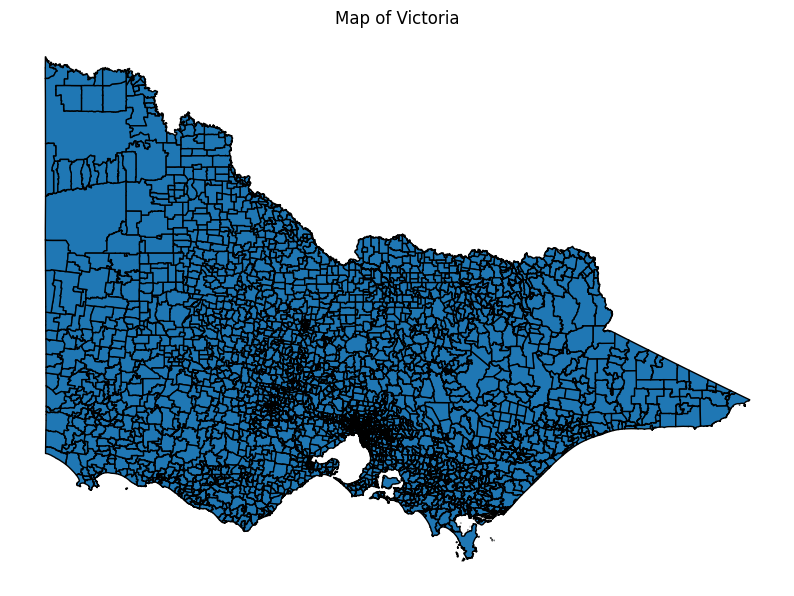

In [59]:
gdf = gpd.read_file("../data/landing/SAL_2021_AUST_GDA2020_SHP/SAL_2021_AUST_GDA2020.shp")

victoria_gdf = gdf[gdf['STE_NAME21'] == 'Victoria']

# Display the first few rows of the filtered GeoDataFrame
victoria_gdf.head()

# Plot the filtered GeoDataFrame
victoria_gdf.plot(figsize=(10, 10), edgecolor='black')

# Set title and show the plot
plt.title('Map of Victoria')
plt.axis('off')  # Turn off the axis
plt.show()

In [60]:
victoria_gdf.head()

,SAL_CODE21,SAL_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
4544,20001,Abbeyard,2,Victoria,AUS,Australia,327.5008,http://linked.data.gov.au/dataset/asgsed3/SAL/...,1.207678,0.033162,"POLYGON ((146.89824 -37.04602, 146.89947 -37.0..."
4545,20002,Abbotsford (Vic.),2,Victoria,AUS,Australia,1.7405,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.092990,0.000178,"POLYGON ((145.00195 -37.79665, 145.0019 -37.79..."
4546,20003,Aberfeldie,2,Victoria,AUS,Australia,1.5515,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.059374,0.000159,"POLYGON ((144.89576 -37.76514, 144.89547 -37.7..."
4547,20004,Aberfeldy,2,Victoria,AUS,Australia,10.8319,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.183199,0.001107,"POLYGON ((146.38814 -37.72232, 146.38808 -37.7..."
4548,20005,Acheron,2,Victoria,AUS,Australia,72.6602,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.514040,0.007381,"POLYGON ((145.76731 -37.25433, 145.76757 -37.2..."


In [61]:
print(len(victoria_gdf))

2946


In [62]:
# import zipfile
# import os

# # Path to the zip file
# zip_file_path = '../data/SA2/SA2.zip'

# # Directory where the zip file should be extracted
# extract_to_directory = '../data/SA2/SA2_extracted'

# # Create the directory if it doesn't exist
# os.makedirs(extract_to_directory, exist_ok=True)

# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_directory)

# print(f"Files extracted to {extract_to_directory}")

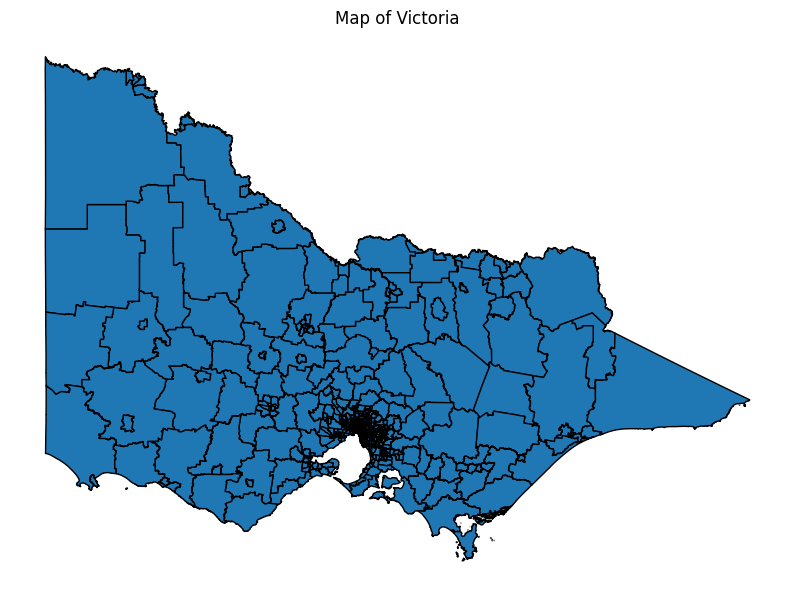

In [63]:
gdf_sa = gpd.read_file("../data/SA2/SA2_extracted/SA2_2021_AUST_GDA2020.shp")

victoria_gdf_sa = gdf_sa[gdf_sa['STE_NAME21'] == 'Victoria']

# Display the first few rows of the filtered GeoDataFrame
victoria_gdf_sa.head()

# Plot the filtered GeoDataFrame
victoria_gdf_sa.plot(figsize=(10, 10), edgecolor='black')

# Set title and show the plot
plt.title('Map of Victoria')
plt.axis('off')  # Turn off the axis
plt.show()

In [64]:
victoria_gdf_sa.head()

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
644,201011001,Alfredton,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,52.7109,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5..."
645,201011002,Ballarat,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,12.3787,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5..."
646,201011005,Buninyong,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,51.5855,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6..."
647,201011006,Delacombe,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,34.1607,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.7505 -37.59119, 143.75044 -37.59..."
648,201011007,Smythes Creek,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,104.7274,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6..."


In [65]:
# Ensure both GeoDataFrames are in the same coordinate reference system (CRS)
victoria_gdf = victoria_gdf.to_crs(victoria_gdf_sa.crs)

# Perform a spatial join to find suburbs that intersect with SA2 regions
joined_gdf = gpd.sjoin(victoria_gdf, victoria_gdf_sa, how='inner', predicate='intersects')

# Calculate the area of overlap for each suburb-SA2 pair
joined_gdf['overlap_area'] = joined_gdf.geometry.area

# Group by suburb and find the SA2 region with the largest overlap area
dominant_sa2 = joined_gdf.loc[joined_gdf.groupby('SAL_NAME21')['overlap_area'].idxmax()]

# Remove '(Vic.)' from the SAL_NAME21 column
dominant_sa2['SAL_NAME21'] = dominant_sa2['SAL_NAME21'].str.replace(r'\s*\(Vic\.\)', '', regex=True)

# Select relevant columns for the grouped DataFrame
grouped_df = dominant_sa2[['SA2_NAME21', 'SAL_NAME21']]

# Group by SA2 region and aggregate the suburbs into a list
grouped_df = grouped_df.groupby('SA2_NAME21').agg({'SAL_NAME21': list}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['SA2_Region', 'Suburbs']

# Display the resulting DataFrame
print("SA2 Regions with Suburbs:")



SA2 Regions with Suburbs:


/var/folders/yg/_fjjq8pn4sddkcj7f3bzk7kr0000gn/T/ipykernel_80510/4072660537.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  joined_gdf['overlap_area'] = joined_gdf.geometry.area


In [66]:
grouped_df.head(30)

,SA2_Region,Suburbs
0,Abbotsford,"[Abbotsford, Clifton Hill, Collingwood, Fairfi..."
1,Airport West,"[Airport West, Essendon Fields, Keilor East, K..."
2,Albert Park,"[Albert Park, Melbourne, Middle Park, Port Mel..."
3,Alexandra,"[Acheron, Alexandra, Bonnie Doon, Buxton, Camb..."
4,Alfredton,"[Alfredton, Bo Peep, Bunkers Hill, Cardigan, C..."
5,Alphington - Fairfield,"[Alphington, Fairfield, Ivanhoe, Northcote, Th..."
6,Alps - East,"[Benambra, Bindi, Brumby, Buchan, Butchers Rid..."
7,Alps - West,"[Arbuckle, Billabong, Briagolong, Budgee Budge..."
8,Altona,"[Altona, Altona Meadows, Altona North, Laverto..."
9,Altona Meadows,"[Altona, Altona Meadows, Laverton, Point Cook,..."


In [67]:
# URL of the Excel file
url = "https://files.crimestatistics.vic.gov.au/2024-09/Data_Tables_LGA_Recorded_Offences_Year_Ending_June_2024.xlsx"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Write the content to a file
    with open("../data/landing/recorded_offences_data.xlsx", 'wb') as file:
        file.write(response.content)
    print("File downloaded and saved")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded and saved


In [68]:
# Read the entire Excel file to find the names of the sheets
xls = pd.ExcelFile("../data/landing/recorded_offences_data.xlsx")

# Display the names of the sheets
print("Available sheets:", xls.sheet_names)

# Load Table 3 (replace 'Sheet3' with the actual sheet name if necessary)
# You can find the sheet name from the output above
table3_df = pd.read_excel(xls, sheet_name='Table 03')  # Use the correct sheet name for Table 3

# Display the first few rows of Table 3
print("Table 3 Data:")
table3_df.head()

Available sheets: ['Contents', 'Footnotes', 'Table 01', 'Table 02', 'Table 03', 'Table 04', 'Table 05', 'Table 06']
Table 3 Data:


,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2024,June,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B42 Steal from a motor vehicle,1
1,2024,June,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B49 Other theft,1
2,2024,June,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,3
3,2024,June,Alpine,3691,Dederang,D Public order and security offences,D10 Weapons and explosives offences,D13 Explosives offences,1
4,2024,June,Alpine,3691,Mongans Bridge,B Property and deception offences,B40 Theft,B49 Other theft,1


In [69]:
crime_data = table3_df[table3_df['Year'] == 2024].groupby('Suburb/Town Name')['Offence Count'].sum().reset_index()

# Rename columns for clarity
crime_data.columns = ['Suburb/Town Name', 'Total Offence Count']

# Display the grouped DataFrame
print("Grouped Data for Year 2024:")
crime_data.head()

Grouped Data for Year 2024:


,Suburb/Town Name,Total Offence Count
0,Abbotsford,1350
1,Aberfeldie,139
2,Aberfeldy,1
3,Acheron,1
4,Ada,1


In [70]:
print(len(crime_data))

2350


In [71]:
exploded_sa2_df = grouped_df.explode('Suburbs')

# Merge the exploded SA2 DataFrame with the crime data
merged_df = pd.merge(exploded_sa2_df, crime_data, left_on='Suburbs', right_on='Suburb/Town Name', how='outer')

# Rename columns for clarity
merged_df.rename(columns={'Offence Count': 'Total Offences'}, inplace=True)

# Display the resulting DataFrame
print("Merged DataFrame with SA2 Regions and Offences:")
merged_df.head(30)

Merged DataFrame with SA2 Regions and Offences:


,SA2_Region,Suburbs,Suburb/Town Name,Total Offence Count
0,Bright - Mount Beauty,Abbeyard,NaN,NaN
1,Wangaratta Surrounds,Abbeyard,NaN,NaN
2,Abbotsford,Abbotsford,Abbotsford,1350.0
3,Clifton Hill - Alphington,Abbotsford,Abbotsford,1350.0
4,Collingwood,Abbotsford,Abbotsford,1350.0
5,Hawthorn - North,Abbotsford,Abbotsford,1350.0
6,Kew - West,Abbotsford,Abbotsford,1350.0
7,Richmond - North,Abbotsford,Abbotsford,1350.0
8,Essendon (West) - Aberfeldie,Aberfeldie,Aberfeldie,139.0
9,Essendon - East,Aberfeldie,Aberfeldie,139.0


In [72]:
# Group by 'SA2_Region' and sum the 'Total Offence Count'
collapsed_df = merged_df.groupby('SA2_Region', as_index=False).agg({'Total Offence Count': 'sum'})

# Display the resulting DataFrame
print("Collapsed DataFrame with unique SA2 Regions and Total Offence Count:")
collapsed_df.head()

Collapsed DataFrame with unique SA2 Regions and Total Offence Count:


,SA2_Region,Total Offence Count
0,Abbotsford,9898.0
1,Airport West,3429.0
2,Albert Park,33245.0
3,Alexandra,552.0
4,Alfredton,4281.0


In [73]:
# Merge the base_df with the homelessness data on 'SA2_name_2021'
base_df = pd.merge(base_df, collapsed_df, left_on='SA2_name_2021', right_on='SA2_Region', how='left')

# Rename the '2024' column from the homelessness data to 'homelessness'
base_df.rename(columns={'Total Offence Count': 'num_crimes'}, inplace=True)
base_df = base_df.drop('SA2_Region', axis=1)
# Display the first 10 rows of the merged DataFrame
base_df.head(10)

,SA2_name_2021,num_businesses,homelessness,num_crimes
0,Abbotsford,1783.700000,106.466667,9898.0
1,Airport West,1032.100000,6.533333,3429.0
2,Albert Park,5590.500000,34.666667,33245.0
3,Alexandra,889.000000,29.866667,552.0
4,Alfredton,1323.900000,0.000000,4281.0
5,Alphington - Fairfield,1201.100000,35.666667,4805.0
6,Alps - East,1462.636609,0.000000,57.0
7,Alps - West,12.000000,0.000000,97.0
8,Altona,1314.600000,36.466667,5510.0
9,Altona Meadows,1082.200000,60.533333,4944.0


In [74]:
# Read the CSV file into a DataFrame
population = pd.read_csv('../data/curated/extrapolated_population.csv')
population.rename(columns={'Unnamed: 0': 'SA2_name_2021'}, inplace=True)
population = population[['SA2_name_2021', '2024']].copy()

# Merge the base_df with the homelessness data on 'SA2_name_2021'
base_df = pd.merge(base_df, population, on='SA2_name_2021', how='left')

# Rename the '2024' column from the homelessness data to 'homelessness'
base_df.rename(columns={'2024': 'population'}, inplace=True)
base_df['population'].fillna(0, inplace=True)

# Display the first 10 rows of the merged DataFrame
base_df.head(10) # there are about 150 rows which are NA

/var/folders/yg/_fjjq8pn4sddkcj7f3bzk7kr0000gn/T/ipykernel_80510/802509739.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_df['population'].fillna(0, inplace=True)


,SA2_name_2021,num_businesses,homelessness,num_crimes,population
0,Abbotsford,1783.700000,106.466667,9898.0,13929.0
1,Airport West,1032.100000,6.533333,3429.0,8825.0
2,Albert Park,5590.500000,34.666667,33245.0,18449.0
3,Alexandra,889.000000,29.866667,552.0,6850.0
4,Alfredton,1323.900000,0.000000,4281.0,16896.0
5,Alphington - Fairfield,1201.100000,35.666667,4805.0,11421.0
6,Alps - East,1462.636609,0.000000,57.0,3.0
7,Alps - West,12.000000,0.000000,97.0,24.0
8,Altona,1314.600000,36.466667,5510.0,14537.0
9,Altona Meadows,1082.200000,60.533333,4944.0,21558.0


In [75]:
# AREASQKM21
copied_victoria_gdf_sa = victoria_gdf_sa[['SA2_NAME21', 'AREASQKM21']].copy()
base_df = pd.merge(base_df, copied_victoria_gdf_sa, left_on='SA2_name_2021', right_on='SA2_NAME21', how='left')
base_df = base_df.drop('SA2_NAME21', axis=1)
base_df.head()

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21
0,Abbotsford,1783.7,106.466667,9898.0,13929.0,1.7405
1,Airport West,1032.1,6.533333,3429.0,8825.0,3.7194
2,Albert Park,5590.5,34.666667,33245.0,18449.0,4.6747
3,Alexandra,889.0,29.866667,552.0,6850.0,2118.9554
4,Alfredton,1323.9,0.000000,4281.0,16896.0,52.7109


In [76]:
base_df['population_density'] = base_df['population'] / base_df['AREASQKM21']

# Display the first 10 rows to check the result
base_df.head(10)

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21,population_density
0,Abbotsford,1783.700000,106.466667,9898.0,13929.0,1.7405,8002.872738
1,Airport West,1032.100000,6.533333,3429.0,8825.0,3.7194,2372.694521
2,Albert Park,5590.500000,34.666667,33245.0,18449.0,4.6747,3946.563416
3,Alexandra,889.000000,29.866667,552.0,6850.0,2118.9554,3.232725
4,Alfredton,1323.900000,0.000000,4281.0,16896.0,52.7109,320.540913
5,Alphington - Fairfield,1201.100000,35.666667,4805.0,11421.0,2.8853,3958.340554
6,Alps - East,1462.636609,0.000000,57.0,3.0,2071.2834,0.001448
7,Alps - West,12.000000,0.000000,97.0,24.0,2955.6802,0.008120
8,Altona,1314.600000,36.466667,5510.0,14537.0,17.6826,822.107609
9,Altona Meadows,1082.200000,60.533333,4944.0,21558.0,10.5419,2044.982404


In [77]:
median_rent = pd.read_csv('../data/curated/extrapolated_median_rent.csv')
median_rent = median_rent[['SA2_name_2021', '2024']].copy()

# Merge the base_df with the median rent data on 'SA2_name_2021'
base_df = pd.merge(base_df, median_rent, on='SA2_name_2021', how='left')

# Rename the '2024' column from the median rent data to 'median_rent'
base_df.rename(columns={'2024': 'median_rent'}, inplace=True)
# Display the first 10 rows of the merged DataFrame
base_df.head(10)

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21,population_density,median_rent
0,Abbotsford,1783.700000,106.466667,9898.0,13929.0,1.7405,8002.872738,438.333333
1,Airport West,1032.100000,6.533333,3429.0,8825.0,3.7194,2372.694521,426.800000
2,Albert Park,5590.500000,34.666667,33245.0,18449.0,4.6747,3946.563416,509.800000
3,Alexandra,889.000000,29.866667,552.0,6850.0,2118.9554,3.232725,275.666667
4,Alfredton,1323.900000,0.000000,4281.0,16896.0,52.7109,320.540913,406.333333
5,Alphington - Fairfield,1201.100000,35.666667,4805.0,11421.0,2.8853,3958.340554,408.466667
6,Alps - East,1462.636609,0.000000,57.0,3.0,2071.2834,0.001448,388.932872
7,Alps - West,12.000000,0.000000,97.0,24.0,2955.6802,0.008120,0.000000
8,Altona,1314.600000,36.466667,5510.0,14537.0,17.6826,822.107609,420.933333
9,Altona Meadows,1082.200000,60.533333,4944.0,21558.0,10.5419,2044.982404,360.533333


## NOW WE WANT TO GET DATA ON NUMBER OF AMMENETIES PER SUBURB:

In [78]:
def fetch_amenities(api, node_query, way_query):
    '''
    Calls an api to the Overpass service to retrieve both the nodes and ways for the 
    given amenity types and returns a dataframe of each amenity in Victoria
    '''
    
    # Extract data into a list
    amenities_data = []

    # Execute the query for the nodes
    node_results = api.query(f"[out:json];area[name='Victoria']->.searchArea;({node_query});out body;")
    
    # Process nodes
    for node in node_results.nodes:
        amenities_data.append({
            "id": node.id,
            "name": node.tags.get("name", "N/A"),
            "amenity": node.tags.get("amenity"),
            "lat": node.lat,
            "lon": node.lon
        })

    # Execute the query for the ways
    way_results = api.query(f"[out:json];area[name='Victoria']->.searchArea;({way_query});(._;>;);out body;")

    # Process ways (calculate centroid from nodes)
    for way in way_results.ways:

        way_name = way.tags.get("name", "N/A")
        if way_name == "N/A":
            continue  # Skip this way if the name is missing

        node_latitudes = []
        node_longitudes = []
        
        # Iterate over each node in the way
        for node in way.nodes:
            node_latitudes.append(node.lat)
            node_longitudes.append(node.lon)
        
        # Calculate centroid (average of latitudes and longitudes)
        if node_latitudes and node_longitudes:
            centroid_lat = sum(node_latitudes) / len(node_latitudes)
            centroid_lon = sum(node_longitudes) / len(node_longitudes)
            
            # Append the way data with centroid
            amenities_data.append({
                "id": way.id,
                "name": way_name,
                "amenity": way.tags.get("amenity"),
                "lat": centroid_lat,
                "lon": centroid_lon
            })

    # Convert to DataFrame
    df_amenities = pd.DataFrame(amenities_data)

    return df_amenities


In [79]:
# Initialize the Overpass API
overpass_api = overpy.Overpass()


In [80]:
# SA2 Shapefile
sa2_gdf = gpd.read_file("../data/SA2/SA2_extracted/SA2_2021_AUST_GDA2020.shp")

In [81]:
# Dictionary storing the queries for different amenities (nodes and ways)
queries = {
    "education": ["""
        node["amenity"="kindergarten"](area.searchArea);
        node["amenity"="school"](area.searchArea);
    """, 
    """
        way["amenity"="kindergarten"](area.searchArea);
        way["amenity"="school"](area.searchArea);
    """],
    "parks_and_gardens": ["""
        node["leisure"="park"](area.searchArea);
        node["leisure"="garden"](area.searchArea);
    """,
    """
        way["leisure"="park"](area.searchArea);
        way["leisure"="garden"](area.searchArea);
    """],
    "train_station": ["""
        node["railway"="station"](area.searchArea);
    """, 
    """
        way["railway"="station"](area.searchArea);
    """],
    "shopping": ["""
        node["shop"="supermarket"](area.searchArea);
        node["shop"="mall"](area.searchArea);
    """, 
    """
        way["shop"="supermarket"](area.searchArea);
        way["shop"="mall"](area.searchArea);
    """],
    "healthcare": ["""
        node["amenity"="hospital"](area.searchArea);
        node["amenity"="clinic"](area.searchArea);
    """,
    """
        way["amenity"="hospital"](area.searchArea);
        way["amenity"="clinic"](area.searchArea);
    """]
}



In [82]:
# Dictionary to store DataFrames for each amenity
amenities_dfs = {}

# Iterate through the queries and fetch data for each
for amenity_type, query in queries.items():
    try:
        df = fetch_amenities(overpass_api, query[0], query[1])
        amenities_dfs[amenity_type] = df
        print(f"Successfully fetched data for {amenity_type}")
    except Exception as e:
        print(f"Error fetching data for {amenity_type}: {e}")


Successfully fetched data for education
Successfully fetched data for parks_and_gardens
Successfully fetched data for train_station
Successfully fetched data for shopping
Successfully fetched data for healthcare


In [83]:
def map_amenities_to_sa2(df_amenities, sa2_gdf):
    '''
    Maps amenities to SA2 regions and returns a Pandas DataFrame with the SA2 name appended.
    '''
    
    # Create a GeoDataFrame for amenities
    gdf_amenities = gpd.GeoDataFrame(df_amenities, 
                                     geometry=gpd.points_from_xy(df_amenities.lon, df_amenities.lat),
                                     crs="EPSG:4326")
    
    # Perform a spatial join to find which SA2 region each amenity belongs to
    gdf_amenities_with_sa2 = gpd.sjoin(gdf_amenities, sa2_gdf[['SA2_NAME21', 'geometry']], how="left", predicate="within")
    
    # Convert the GeoDataFrame back to a Pandas DataFrame and keep only the necessary columns
    df_amenities_with_sa2 = pd.DataFrame(gdf_amenities_with_sa2.drop(columns=['geometry']))

    # Return only the original columns and the SA2 name
    return df_amenities_with_sa2[['id', 'name', 'amenity', 'lat', 'lon', 'SA2_NAME21']]






In [84]:
# Iterates through each amenity and adds SA2 region

for amenity_type, amenity_df in amenities_dfs.items():
    try:
        df = map_amenities_to_sa2(amenity_df, sa2_gdf)
        amenities_dfs[amenity_type] = df
        print(f"Successfully fetched SA2 regions for {amenity_type}")
    except Exception as e:
        print(f"Error fetching SA2 region for {amenity_type}: {e}")


/var/folders/yg/_fjjq8pn4sddkcj7f3bzk7kr0000gn/T/ipykernel_80510/3467261955.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:7844

  gdf_amenities_with_sa2 = gpd.sjoin(gdf_amenities, sa2_gdf[['SA2_NAME21', 'geometry']], how="left", predicate="within")
/var/folders/yg/_fjjq8pn4sddkcj7f3bzk7kr0000gn/T/ipykernel_80510/3467261955.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:7844

  gdf_amenities_with_sa2 = gpd.sjoin(gdf_amenities, sa2_gdf[['SA2_NAME21', 'geometry']], how="left", predicate="within")


Successfully fetched SA2 regions for education
Successfully fetched SA2 regions for parks_and_gardens
Successfully fetched SA2 regions for train_station


/var/folders/yg/_fjjq8pn4sddkcj7f3bzk7kr0000gn/T/ipykernel_80510/3467261955.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:7844

  gdf_amenities_with_sa2 = gpd.sjoin(gdf_amenities, sa2_gdf[['SA2_NAME21', 'geometry']], how="left", predicate="within")
/var/folders/yg/_fjjq8pn4sddkcj7f3bzk7kr0000gn/T/ipykernel_80510/3467261955.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:7844

  gdf_amenities_with_sa2 = gpd.sjoin(gdf_amenities, sa2_gdf[['SA2_NAME21', 'geometry']], how="left", predicate="within")
/var/folders/yg/_fjjq8pn4sddkcj7f3bzk7kr0000gn/T/ipykernel_80510/3467261955.py:12: UserWarning: CRS mismatch between the CRS of left geometries 

Successfully fetched SA2 regions for shopping
Successfully fetched SA2 regions for healthcare


In [85]:
# Test to see if SA2 was added
amenities_dfs['education']


,id,name,amenity,lat,lon,SA2_NAME21
0,148544339,Syndal Pre-School,kindergarten,-37.8741972,145.1487815,Glen Waverley - West
1,191834621,Tally Ho Preschool,kindergarten,-37.8691111,145.1642861,Glen Waverley - West
2,207718805,St Johns Pre-School,kindergarten,-37.8979989,145.1137432,Oakleigh - Huntingdale
3,246969693,Waverley Foothills Preschool,kindergarten,-37.9316411,145.2000972,Mulgrave
4,247169615,Brunswick Crèche & Day Nursery,kindergarten,-37.7722530,144.9662900,Brunswick - South
...,...,...,...,...,...,...
3475,1315871094,Shine Bright St Margaret's Kindergarten,kindergarten,-34.19080758,142.1574592,Mildura - North
3476,1316142653,St Albans East Preschool,kindergarten,-37.74306644285714285714285714,144.8165961571428571428571429,St Albans - North
3477,1318009340,Country Bunch Early Learning,kindergarten,-34.23471761666666666666666667,142.18055925,Irymple
3478,1318025539,Montessori Beginnings,kindergarten,-34.22681335,142.1609060,Irymple


In [86]:
# HERE WE COUNT THE NUMBER OF AMENITIES PER SA2 REGION

amenities_sa2_counts = {}

# Iterate through the amenities DataFrames
for amenity_type, df in amenities_dfs.items():
    # Group by SA2_NAME21 and count the number of occurrences
    sa2_count_df = df.groupby('SA2_NAME21').size().reset_index(name='count')
    
    # Store the result in the new dictionary with a key indicating the amenity
    amenities_sa2_counts[f"{amenity_type}_sa2_count"] = sa2_count_df
    
    # Print the result for each amenity
    print(f"SA2 counts for {amenity_type}:")
    print(sa2_count_df.head())  # Show t

SA2 counts for education:
     SA2_NAME21  count
0    Abbotsford      3
1  Airport West      8
2   Albert Park      7
3     Alexandra      8
4     Alfredton      6
SA2 counts for parks_and_gardens:
     SA2_NAME21  count
0    Abbotsford     13
1  Airport West      7
2   Albert Park     15
3     Alexandra     13
4     Alfredton     21
SA2 counts for train_station:
               SA2_NAME21  count
0              Abbotsford      2
1  Alphington - Fairfield      2
2                  Altona      3
3                  Ararat      1
4         Ardeer - Albion      1
SA2 counts for shopping:
     SA2_NAME21  count
0    Abbotsford      8
1  Airport West      5
2   Albert Park      5
3     Alexandra      3
4     Alfredton      3
SA2 counts for healthcare:
               SA2_NAME21  count
0             Albert Park      6
1               Alexandra      3
2               Alfredton      2
3  Alphington - Fairfield      8
4          Altona Meadows      1


In [87]:
education_count = amenities_sa2_counts['education_sa2_count']
parks_count = amenities_sa2_counts['parks_and_gardens_sa2_count']
healthcare_count = amenities_sa2_counts['healthcare_sa2_count']
shopping_count = amenities_sa2_counts['shopping_sa2_count']
train_count = amenities_sa2_counts['train_station_sa2_count']

NOW WE MERGE THESE AMMENITIES COUNTS WITH THE BASE LIVEABILITY DF

In [88]:
def merge_ammentity(base_df, ammenity_df, ammenity_name):
    base_df = pd.merge(base_df, ammenity_df, left_on='SA2_name_2021', right_on='SA2_NAME21', how='left')
    base_df.rename(columns={'count': ammenity_name}, inplace=True)
    base_df[ammenity_name] = base_df[ammenity_name].fillna(0)
    base_df = base_df.drop('SA2_NAME21', axis=1)
    return base_df

In [89]:
base_df = merge_ammentity(base_df, education_count, "education_count")
base_df = merge_ammentity(base_df, parks_count, "parks_count")
base_df = merge_ammentity(base_df, healthcare_count, "healthcare_count")
base_df = merge_ammentity(base_df, shopping_count, "shopping_count")
base_df = merge_ammentity(base_df, train_count, "train_count")

In [90]:
base_df.head()

,SA2_name_2021,num_businesses,homelessness,num_crimes,population,AREASQKM21,population_density,median_rent,education_count,parks_count,healthcare_count,shopping_count,train_count
0,Abbotsford,1783.7,106.466667,9898.0,13929.0,1.7405,8002.872738,438.333333,3.0,13.0,0.0,8.0,2.0
1,Airport West,1032.1,6.533333,3429.0,8825.0,3.7194,2372.694521,426.800000,8.0,7.0,0.0,5.0,0.0
2,Albert Park,5590.5,34.666667,33245.0,18449.0,4.6747,3946.563416,509.800000,7.0,15.0,6.0,5.0,0.0
3,Alexandra,889.0,29.866667,552.0,6850.0,2118.9554,3.232725,275.666667,8.0,13.0,3.0,3.0,0.0
4,Alfredton,1323.9,0.000000,4281.0,16896.0,52.7109,320.540913,406.333333,6.0,21.0,2.0,3.0,0.0
